# Support Vector Machine

Classifies data into categories based on a decision boundary/hyperplane which is characterized by data points/vectors surrounding that boundary (the support vector).

In [1]:
# import data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

### Import and preprocess the dataset

In [2]:
# import data
df = pd.read_csv('datasets/social_network.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
# set np precision
np.set_printoptions(precision=6)

# separate features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# print first 5 rows of features
print(f'First 5 rows of features: {X[:5]}')

# print first 5 rows of labels
print(f'First 5 rows of labels: {y[:5]}')

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f'First 5 rows of training set: {X_train[:5]}')

# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# print first 5 rows of scaled training set
print(f'First 5 rows of scaled training set: {X_train[:5]}')

# inverse transform
X_train_inverse = sc.inverse_transform(X_train)
X_test_inverse = sc.inverse_transform(X_test)

# print first 5 rows of inverse transformed training set
print(f'First 5 rows of inverse transformed training set: {X_train_inverse[:5]}')

First 5 rows of features: [[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
First 5 rows of labels: [0 0 0 0 0]
First 5 rows of training set: [[    57 122000]
 [    39  71000]
 [    47  25000]
 [    24  19000]
 [    36  50000]]
First 5 rows of scaled training set: [[ 1.892589  1.521894]
 [ 0.125038  0.032132]
 [ 0.910616 -1.311575]
 [-1.347922 -1.486841]
 [-0.169554 -0.581299]]
First 5 rows of inverse transformed training set: [[5.70e+01 1.22e+05]
 [3.90e+01 7.10e+04]
 [4.70e+01 2.50e+04]
 [2.40e+01 1.90e+04]
 [3.60e+01 5.00e+04]]


### Model Training

#### SVM using linear kernel

In [5]:
# Train the SVM model on the training set
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train)

# predict on test set
y_pred = classifier.predict(X_test)

# print confusion matrix
print(confusion_matrix(y_test, y_pred))

# print classification report
print(classification_report(y_test, y_pred))

[[61  2]
 [12 25]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


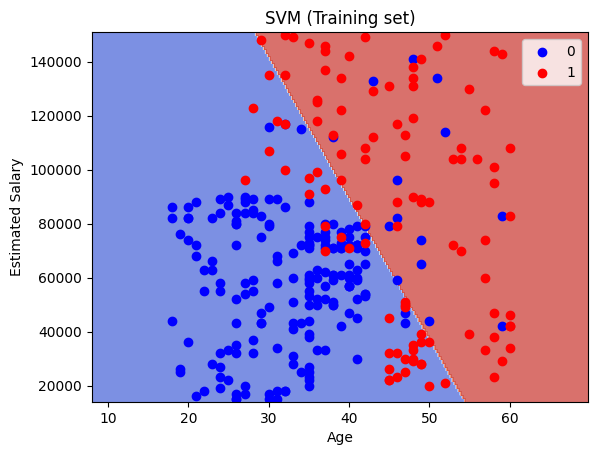

In [6]:
# visualize training set results and decision boundary
X_set = X_train_inverse
y_set = y_train

# create meshgrid
x1, x2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                        np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=10))

# plot decision boundary
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
                alpha=0.75, cmap=plt.cm.coolwarm)

# plot limits
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# plot all data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('b','r'))(i) , label = j)

# plot title
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


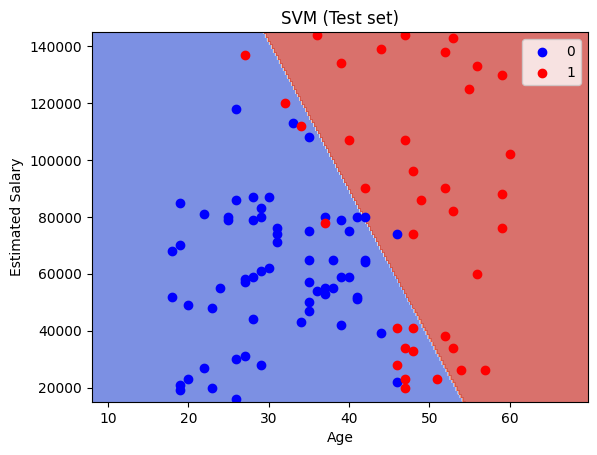

In [7]:
# visualize test set results and decision boundary
X_set = X_test_inverse
y_set = y_test

# create meshgrid
x1, x2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                        np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=10))

# plot decision boundary
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
                alpha=0.75, cmap=plt.cm.coolwarm)

# plot limits
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# plot all data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('b','r'))(i) , label = j)

# plot title
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### SVM using RBF Kernel

In [8]:
# Train the SVM model on the training set using rbf kernel
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(X_train, y_train)

# predict on test set
y_pred = classifier.predict(X_test)

# print confusion matrix
print(confusion_matrix(y_test, y_pred))

# print classification report
print(classification_report(y_test, y_pred))


[[57  6]
 [ 1 36]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.86      0.97      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


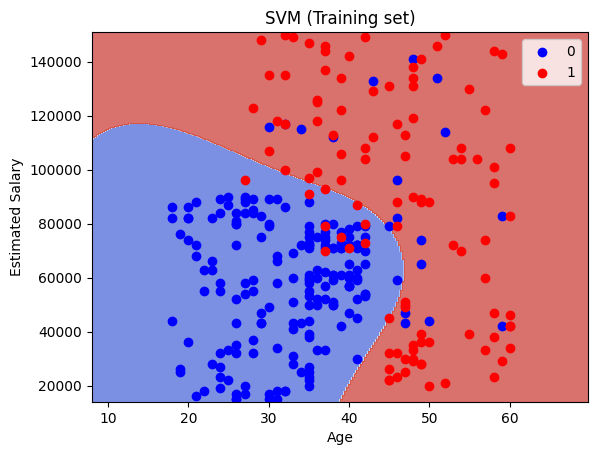

In [9]:
# visualize training set results and decision boundary
X_set = X_train_inverse
y_set = y_train

# create meshgrid
x1, x2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                        np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=10))

# plot decision boundary
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
                alpha=0.75, cmap=plt.cm.coolwarm)

# plot limits
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# plot all data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('b','r'))(i) , label = j)

# plot title
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


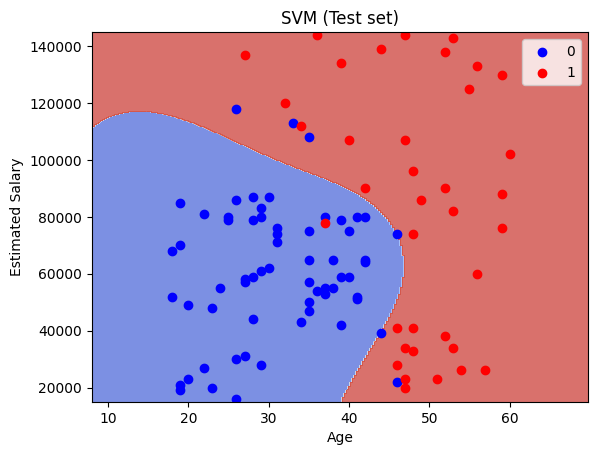

In [10]:
# visualize test set results and decision boundary
X_set = X_test_inverse
y_set = y_test

# create meshgrid
x1, x2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                        np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=10))

# plot decision boundary
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
                alpha=0.75, cmap=plt.cm.coolwarm) 

# plot limits
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# plot all data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('b','r'))(i) , label = j)

# plot title
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


#### SVM using Sigmoid Kernel

In [11]:
# Train the SVM model on the training set using sigmoid kernel
classifier = SVC(kernel='sigmoid', random_state=42)
classifier.fit(X_train, y_train)

# predict on test set
y_pred = classifier.predict(X_test)

# print confusion matrix
print(confusion_matrix(y_test, y_pred))

# print classification report
print(classification_report(y_test, y_pred))

[[50 13]
 [16 21]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78        63
           1       0.62      0.57      0.59        37

    accuracy                           0.71       100
   macro avg       0.69      0.68      0.68       100
weighted avg       0.71      0.71      0.71       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


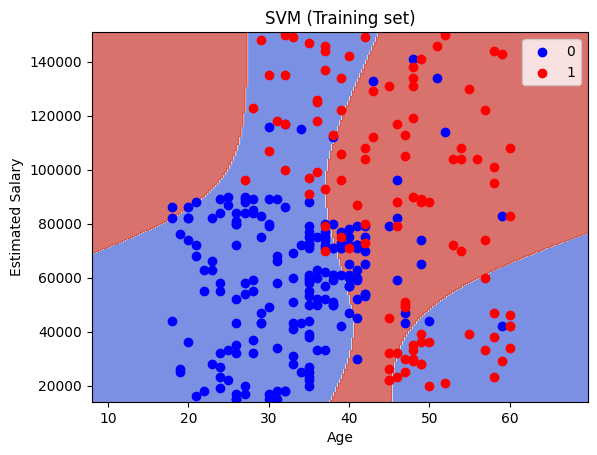

In [12]:
# visualize training set results and decision boundary
X_set = X_train_inverse
y_set = y_train

# create meshgrid
x1, x2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                        np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=10))

# plot decision boundary
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
                alpha=0.75, cmap=plt.cm.coolwarm)

# plot limits
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# plot all data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('b','r'))(i) , label = j)

# plot title
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


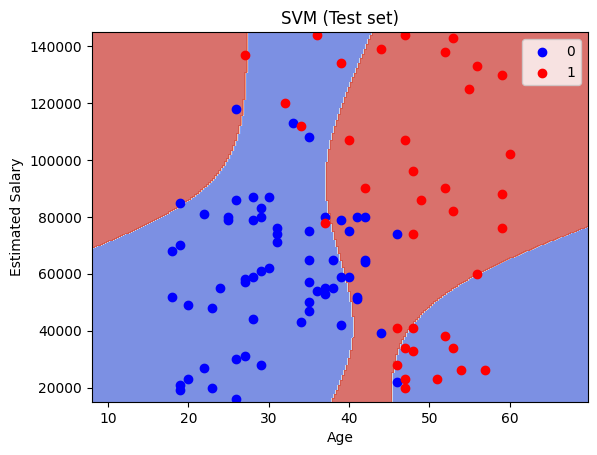

In [13]:
# visualize test set results and decision boundary
X_set = X_test_inverse
y_set = y_test

# create meshgrid
x1, x2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                        np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=10))

# plot decision boundary
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
                alpha=0.75, cmap=plt.cm.coolwarm)

# plot limits
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# plot all data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('b','r'))(i) , label = j)

# plot title
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
